# Analyzing Weather Data using Python

In Data Science, weather forecasting is an application of Time Series Forecasting where we use time-series data and algorithms to make forecasts for a given time.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# !pip install plotly
# !pip install -U kaleido

### Data Upload

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.sample(10)

,date,meantemp,humidity,wind_speed,meanpressure
607,2014-08-31,27.625000,86.125000,4.412500,1001.250000
187,2013-07-07,31.166667,77.333333,7.100000,1000.166667
407,2014-02-12,13.250000,67.000000,9.262500,1013.500000
40,2013-02-10,15.250000,71.500000,3.475000,1017.125000
508,2014-05-24,31.500000,50.500000,6.725000,1004.125000
652,2014-10-15,24.500000,68.000000,3.262500,1013.375000
1328,2016-08-21,31.592593,68.074074,10.022222,1001.192308
909,2015-06-29,31.125000,56.625000,11.562500,1003.625000
772,2015-02-12,15.500000,69.625000,6.025000,1016.125000
903,2015-06-23,31.500000,61.625000,6.012500,995.000000


In [5]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [6]:
df.shape

(1462, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

### Data-preprocessing

In [9]:
# The "date" column here does not have "date" type datatype, hence making the changes.

df['date'] = pd.to_datetime(df['date'], format = "%Y/%m/%d")
df.sample(12)

,date,meantemp,humidity,wind_speed,meanpressure
1068,2015-12-05,17.500000,72.375000,0.925000,1015.875000
60,2013-03-02,19.000000,54.000000,15.725000,1016.250000
432,2014-03-09,22.000000,56.625000,7.650000,1014.500000
109,2013-04-20,30.625000,29.000000,7.637500,1003.375000
67,2013-03-09,25.428571,49.714286,5.285714,1009.285714
384,2014-01-20,14.625000,83.500000,4.412500,1021.375000
209,2013-07-29,31.000000,77.428571,4.771429,997.142857
1260,2016-06-14,32.625000,55.125000,11.860000,997.812500
966,2015-08-25,32.000000,57.285714,10.071429,1001.000000
459,2014-04-05,27.375000,44.000000,9.262500,1008.875000


In [10]:
df.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

In [11]:
# Null Value detection

df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Observation

There are no null values in the datadset for any of the feature.

In [12]:
# Statistical Measures

df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Visualization

#### Mean Temperature in Delhi over the years 

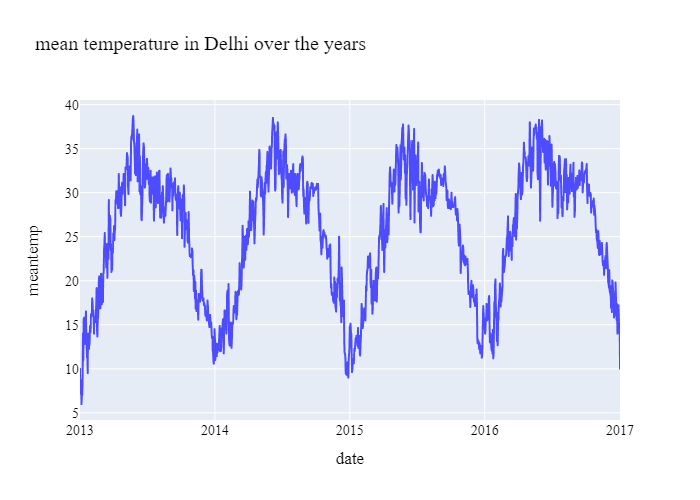

In [13]:
fig = px.line(df, x = 'date', y = 'meantemp', title = 'mean temperature in Delhi over the years')
fig.update_traces(line_color = '#4d4dff')
fig.update_layout(font=dict( family="Cursive", size=14, color="Black"))
fig.show("png")
# fig.show("svg")

### Observation

The rise in temperature occurs from "March-April" till "June", as we move forword to "July" the temperature decreases every year in Delhi.

#### Humidity in Delhi over the years

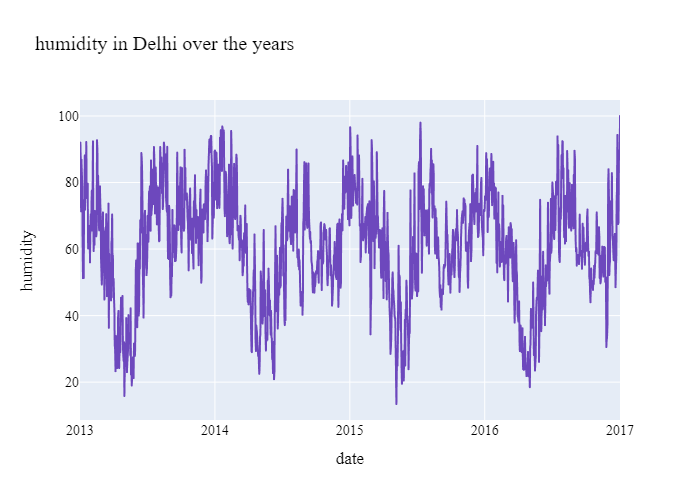

In [14]:
fig = px.line(df, x = 'date', y = 'humidity', title = 'humidity in Delhi over the years')
fig.update_traces(line_color = '#6d48bd')
fig.update_layout(font=dict( family="Cursive", size=14, color="Black"))
fig.show("png")

### Observation

For every year, the the range of humidity decreases in Summer season (i.e. May-June), and for the mansoons and winters we can notice higher humidity. 

#### Wind Speed in Delhi over the years

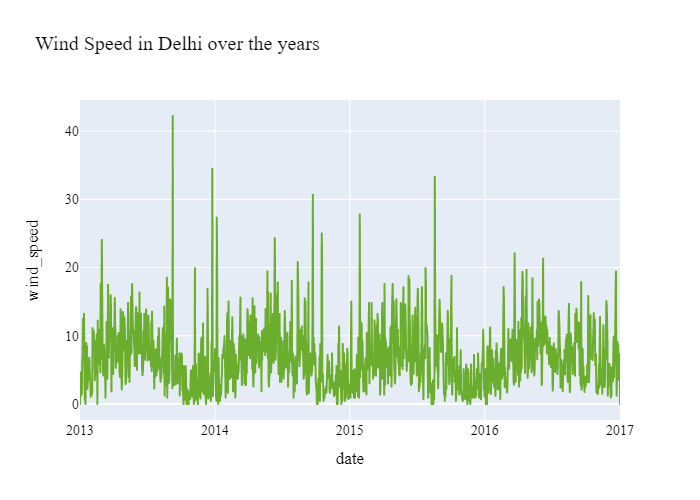

In [15]:
fig = px.line(df, x = 'date', y = 'wind_speed', title = 'Wind Speed in Delhi over the years')
fig.update_traces(line_color = '#6bad2d')
fig.update_layout(font=dict( family="Cursive", size=14, color="Black"))
fig.show("png")

### Observation

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2015, there were no anomalies in wind speed during monsoons.

#### Analysing the relationship between "Temperature" and "Humidity"

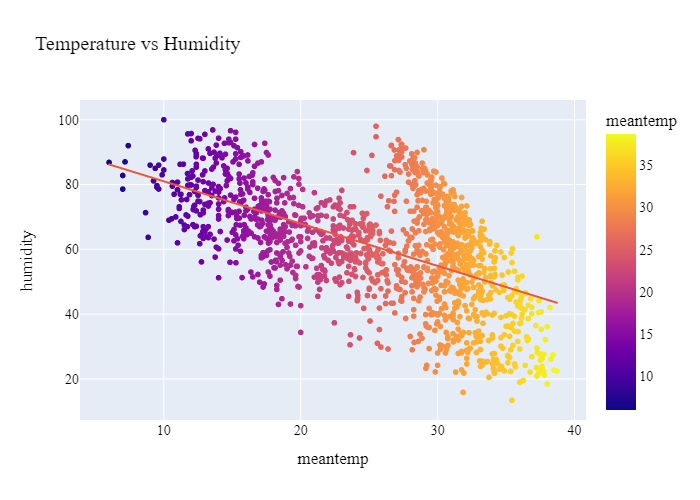

In [16]:
fig = px.scatter(df,x='meantemp',y='humidity',trendline="ols",color='meantemp',title='Temperature vs Humidity')
fig.update_layout(font=dict( family="Cursive", size=14, color="Black"))
fig.show("png")

### Observation

As we can notice from above figure, there is negative correlation between temperature and humidity in Delhi. It means, higher temp results in low humidity and low temp results in high humidity.

(The temperature and humidity are inversly proportional to each other. As temp increases the humidity in the enviornment decreases and vice a versa.)

## Analyzing Temperature Change

Analyze the temperature change in Delhi over the year.

In [17]:
# Lets add two more columns 

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.sample(20)

,date,meantemp,humidity,wind_speed,meanpressure,year,month
915,2015-07-05,35.714286,47.285714,14.014286,995.428571,2015,7
325,2013-11-22,17.625000,74.875000,1.162500,1015.750000,2013,11
1021,2015-10-19,28.142857,66.285714,3.457143,1011.714286,2015,10
85,2013-03-27,21.000000,62.000000,1.850000,1009.000000,2013,3
899,2015-06-19,35.875000,46.750000,8.575000,996.250000,2015,6
1369,2016-10-01,32.541667,61.916667,3.170833,1007.500000,2016,10
430,2014-03-07,18.500000,62.875000,6.712500,1017.125000,2014,3
465,2014-04-11,28.142857,29.000000,10.057143,1008.571429,2014,4
1061,2015-11-28,18.750000,82.125000,1.162500,1015.375000,2015,11
887,2015-06-07,35.000000,36.250000,7.175000,999.250000,2015,6


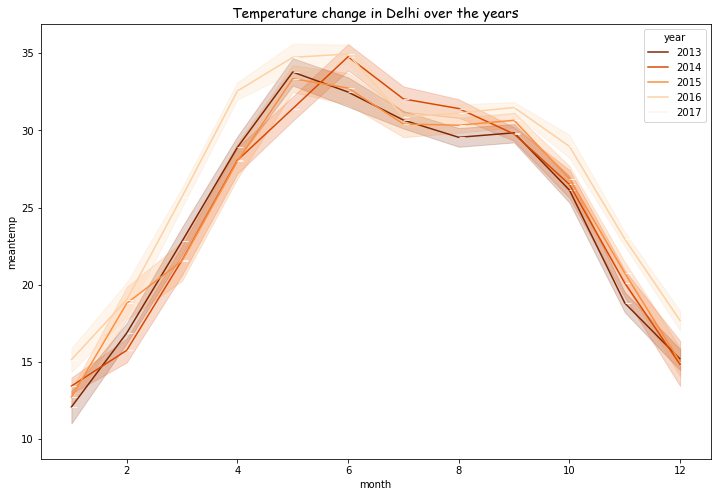

In [18]:
# Temperature change in Delhi over the years

plt.figure(figsize=(12,8))
sns.lineplot(data = df , x='month', y=df['meantemp'], hue=df['year'], palette='Oranges_r', marker=True)
plt.title('Temperature change in Delhi over the years', fontdict = {'fontsize':14,'color':'black','fontname':'Comic Sans MS'})
plt.show("notebook")

### Observation

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

## Forecasting Weather using Python - Facebook Prophet

"What is time series date?" --

As we know time series data is data in which there is a dependency on the time with the data which is being observed. Predicting the future values of the data by analyzing the previous trends and the patterns hidden in the data is known as time series forecasting.

With time multiple time series analyses and forecasting techniques that have evolved in the market like ARIMA or SARIMA, one can also use deep learning-based methods like LSTM and RNN which are specially designed for performing forecasting and analysis of sequential data.

"Facebook Prophet Library" -- 

a) Prophet is an open-source tool from Facebook used for forecasting time series data 
b) helps businesses understand and possibly predict the market. 
c) based on a decomposable additive model where non-linear trends fit with seasonality.

"Why do we need a tool like Prophet to help us with forecasting?" --

a) We need it because, although the basic decomposable additive model looks simple, the calculation of the terms within is hugely mathematical. 
b) If unaware of the calculations and process, it may lead to making wrong forecasts
c) to automate the above we are going to use Prophet. 




In [19]:
# Installing prophet model

!pip install prophet

In [20]:
# The prophet model accepts time data named as “ds”, and labels as “y”. COnverting the data into the same format

df_forecast = df.rename(columns= {'date' : 'ds', 'meantemp' : 'y'})
df_forecast

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [21]:
df_forecast.shape

(1462, 7)

#### Importing Prophet

In [22]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [23]:
model = Prophet()

In [24]:
model.fit(df_forecast)

13:04:34 - cmdstanpy - INFO - Chain [1] start processing
13:04:34 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
forecast= model.make_future_dataframe(periods= 365)

In [26]:
predict = model.predict(forecast)

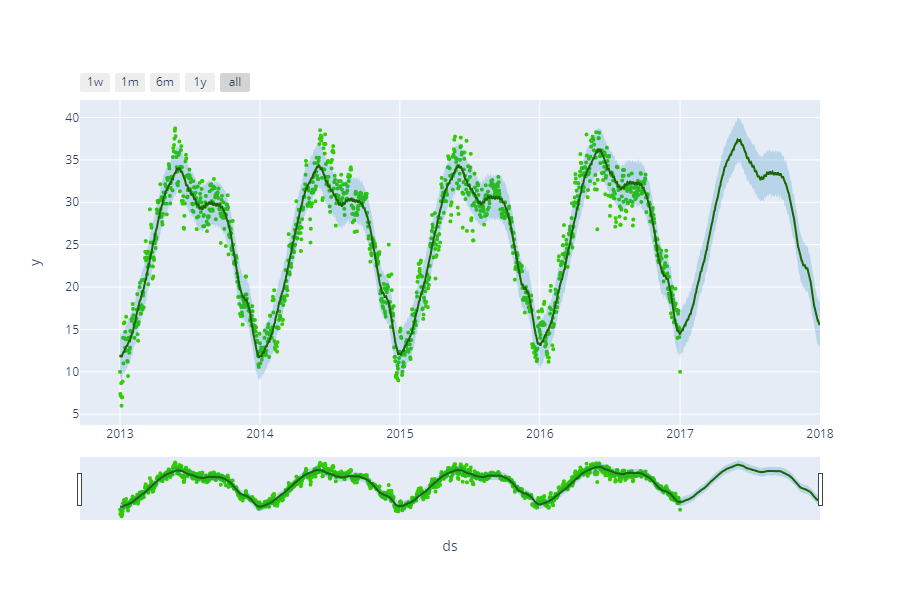

In [27]:
# Plotting the predicted data

fig = plot_plotly(model, predict)
fig.update_traces(line_color='#1a6600', marker={"color": "#33cc00"})
fig.show("png")

## Summary

Weather forecasting is the task of forecasting weather conditions for a given location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days.